<a href="https://colab.research.google.com/github/tentao7/DailyLearning/blob/master/1224_class04_Auction_shery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [3]:
train = pd.read_csv("Auction_master_train.csv")
test = pd.read_csv("Auction_master_test.csv")
print(train.shape, test.shape)

(1933, 41) (829, 41)


In [7]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 110842 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


NanumGothic


Text(0.5,1,'복수의 plot 명령을 한 그림에서 표현')

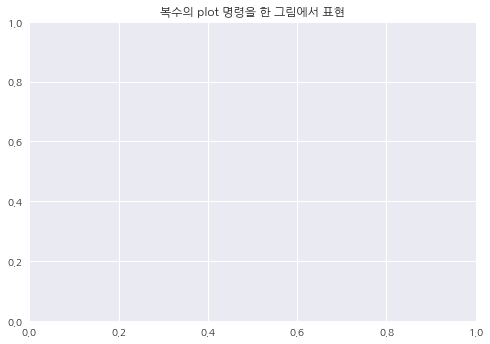

In [8]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib.pyplot as plt
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
plt.title("복수의 plot 명령을 한 그림에서 표현")

Text(0.5,1,'복수의 plot 명령을 한 그림에서 표현')

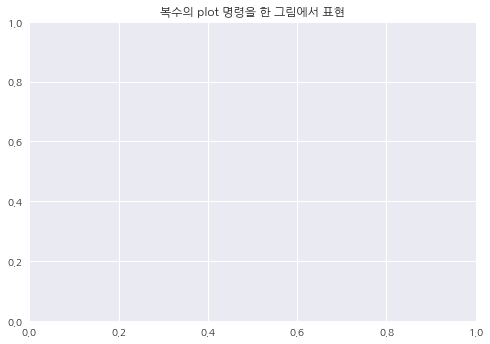

In [11]:
plt.title("복수의 plot 명령을 한 그림에서 표현",fontproperties=font_name)

In [12]:
train.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


##  EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a1e247438>,
      dtype=object)

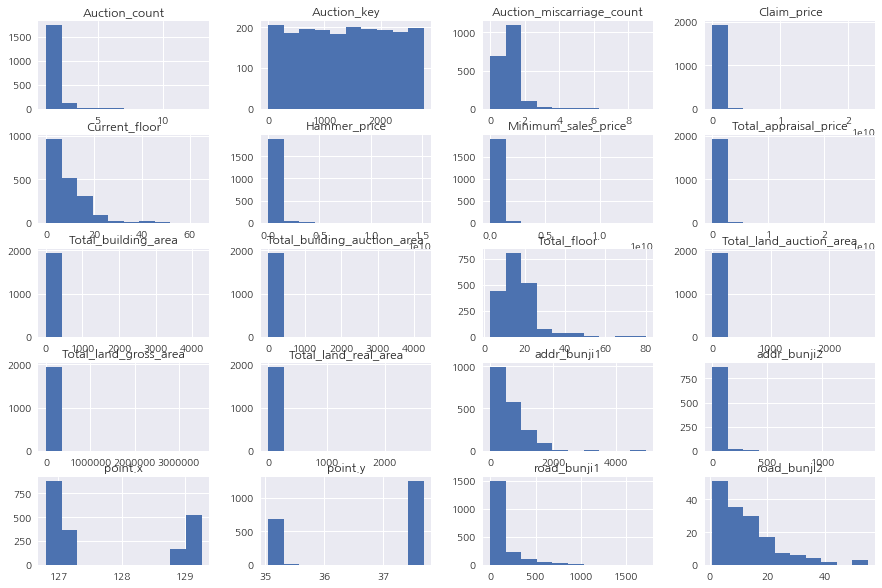

In [13]:
train.hist(figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a1e2a8438>,
      dtype=object)

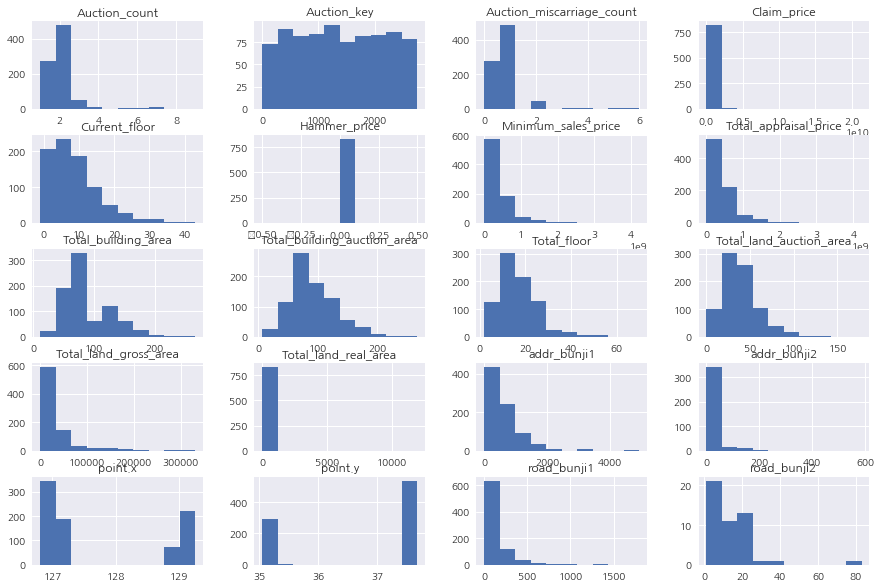

In [14]:
test.hist(figsize=(15,10))

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

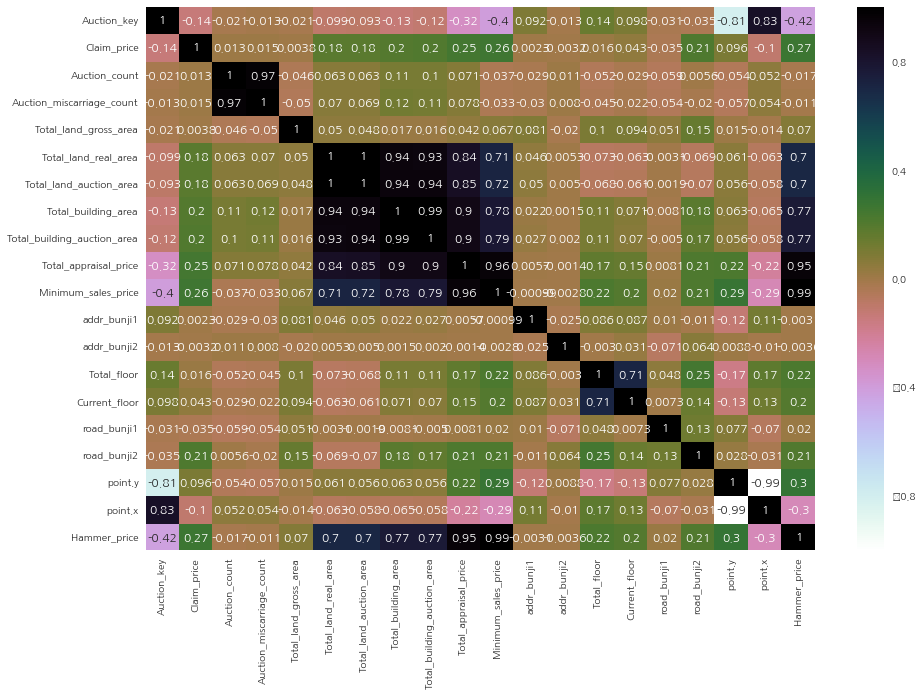

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, cmap='cubehelix_r'  )
plt.show()

### 이상치 제거 

In [17]:
train.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')

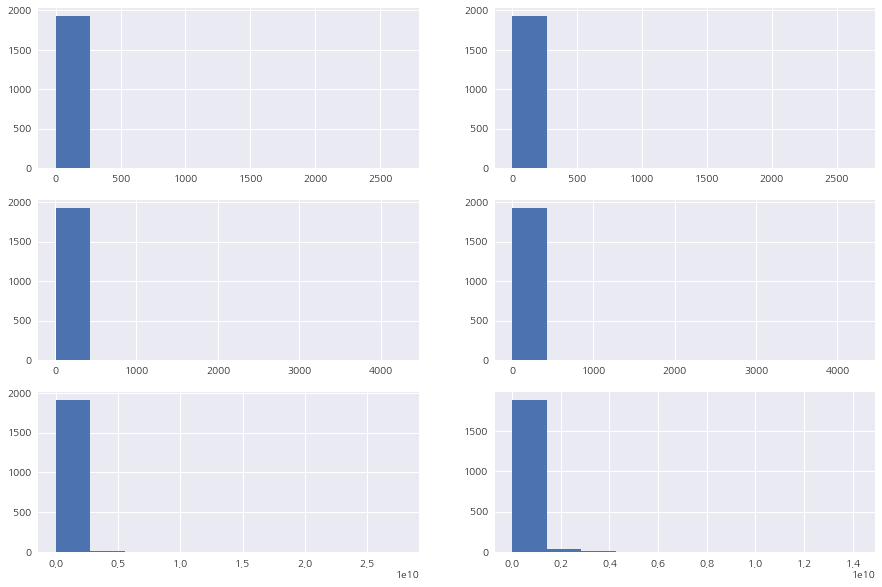

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
train['Total_land_real_area'].hist()
plt.subplot(3,2,2)
train['Total_land_auction_area'].hist()
plt.subplot(3,2,3)
train['Total_building_area'].hist()
plt.subplot(3,2,4)
train['Total_building_auction_area'].hist()
plt.subplot(3,2,5)
train['Total_appraisal_price'].hist()
plt.subplot(3,2,6)
train['Minimum_sales_price'].hist()
plt.show()

In [19]:
dat = train['Bid_class']
dat.value_counts()

일반    1796
개별     125
일괄      12
Name: Bid_class, dtype: int64

In [0]:
train_sub = train[train.Total_land_auction_area <500]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


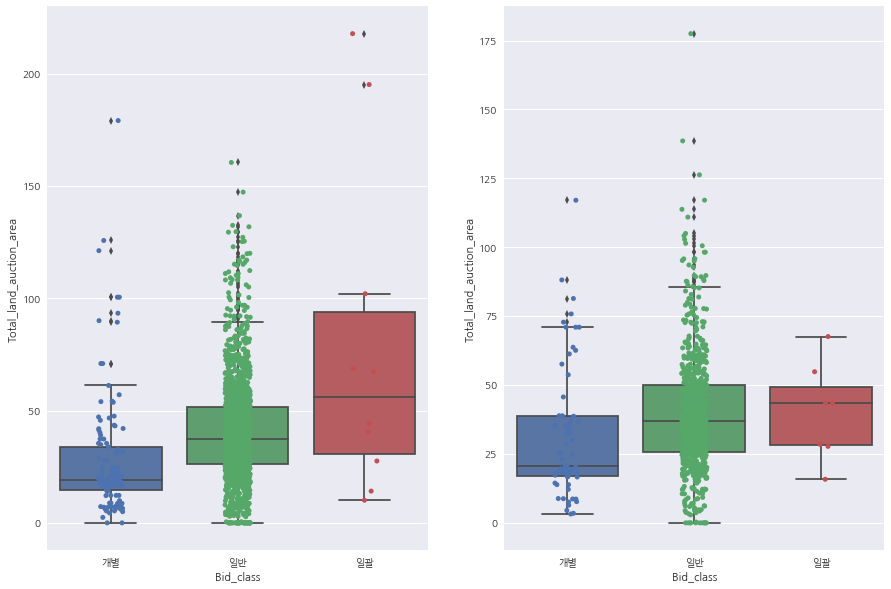

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
ax= sns.boxplot(x="Bid_class", y="Total_land_auction_area", data=train_sub)
ax= sns.stripplot(x="Bid_class", y="Total_land_auction_area", data=train_sub, jitter=True, edgecolor="gray")
plt.subplot(1,2,2)
ax= sns.boxplot(x="Bid_class", y="Total_land_auction_area", data=test)
ax= sns.stripplot(x="Bid_class", y="Total_land_auction_area", data=test, jitter=True, edgecolor="gray")

In [22]:
train_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1931 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1931 non-null int64
Auction_class                  1931 non-null object
Bid_class                      1931 non-null object
Claim_price                    1931 non-null int64
Appraisal_company              1931 non-null object
Appraisal_date                 1931 non-null object
Auction_count                  1931 non-null int64
Auction_miscarriage_count      1931 non-null int64
Total_land_gross_area          1931 non-null float64
Total_land_real_area           1931 non-null float64
Total_land_auction_area        1931 non-null float64
Total_building_area            1931 non-null float64
Total_building_auction_area    1931 non-null float64
Total_appraisal_price          1931 non-null int64
Minimum_sales_price            1931 non-null int64
First_auction_date             1931 non-null object
Final_auction_date             1931 non-null object
Final_resu

## 데이터 전처리

In [23]:
train_sub.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')

In [24]:
print(train_sub.Auction_class.unique() )
print(train_sub.Bid_class.unique() )
print(train_sub.Auction_miscarriage_count.unique() )
print(train_sub.Final_result.unique() )
print(train_sub.Creditor.unique() )
print(train_sub.addr_do.unique() )
print(train_sub.addr_si.unique() )
print(train_sub.addr_dong.unique() )
print(train_sub.road_name.unique() )
print(train_sub.addr_etc.unique() )

['임의' '강제']
['개별' '일반' '일괄']
[1 2 0 5 4 6 3 7 9]
['낙찰']
['베리타스자산관리대부' '흥국저축은행' '국민은행' '고려저축은행' 'Private' '서울보증보험' '천마(새)' '대형선망수협'
 '디에이치대부' '코카콜라음료' '한화저축은행' '프라임대부' '대부F&D' 'HK저축은행' '부산은행' '농협은행'
 '청룡동(새)' '케이에이제7차유동화전문' '신용보증기금' '반야월농협' '제이티캐피탈' '오케이캐피탈대부' '우리은행'
 '대구은행' '삼성카드' '영진건설' '한화손해보험' '하나은행' '유진대부금융' '동부화재해상보험' '비에스금융대부'
 '(주)티베이' '범일5동(새)' '기술보증기금' '중소기업은행' '신한카드' '해운대신협' '승학(새)' '승학신협' '두산건설'
 '동래농협' '농협생명보험' '한국주택금융공사' '현대캐피탈' 'NH농협캐피탈' '신한생명보험' '동부산농협' '경북대구낙농협'
 '부영벽산아파트입주자대표회의' '한국씨티은행' 'KB국민카드' '디지비캐피탈' '베스트피플대부' '세종상호저축은행' '경남은행'
 '북부산(새)' '한국무역보험공사' '스카이저축은행' '에이치에스제일차유동화전문' '영우유통' '명륜동(새)' '구서2동(새)'
 '남천천신협' '부곡동(새)' '한화생명보험' '영남자원' '비엔케이캐피탈' '대양석유(주)' '부산주례(새)' '대청(새)'
 '중부(새)' '기술신용보증기금' '범일동(새)' '경산농협' '국제저축은행' '그랜드코리아레저' '부산동부신협' '신한은행'
 '웰릭스에프앤아이대부' '대구태영신협' '부산평화(새)' '진주서부농협' '감천1동(새)' '제1,2구잠수기수협' '농소농협'
 'SC은행' '진해수협' '서1동(새)' '현대모비스' '부산화명(새)' '성가신협' '제네시스유동화전문' '아주캐피탈'
 '광안신협' '시민공원(새)' 'JT캐피탈' '북부산신협' '사직1동(새)' '신괴정(새)' '진주저축은행' '감만동(새)'
 '중앙농협' '페퍼저축은행

In [25]:
print(train_sub.Auction_class.unique() )
print(train_sub.Bid_class.unique() )
print(train_sub.Auction_miscarriage_count.unique() )
print(train_sub.Final_result.unique() )
print(train_sub.Creditor.unique() )
print(train_sub.addr_do.unique() )
print(train_sub.addr_si.unique() )
print(train_sub.addr_dong.unique() )
print(train_sub.road_name.unique() )
print(train_sub.addr_etc.unique() )

['임의' '강제']
['개별' '일반' '일괄']
[1 2 0 5 4 6 3 7 9]
['낙찰']
['베리타스자산관리대부' '흥국저축은행' '국민은행' '고려저축은행' 'Private' '서울보증보험' '천마(새)' '대형선망수협'
 '디에이치대부' '코카콜라음료' '한화저축은행' '프라임대부' '대부F&D' 'HK저축은행' '부산은행' '농협은행'
 '청룡동(새)' '케이에이제7차유동화전문' '신용보증기금' '반야월농협' '제이티캐피탈' '오케이캐피탈대부' '우리은행'
 '대구은행' '삼성카드' '영진건설' '한화손해보험' '하나은행' '유진대부금융' '동부화재해상보험' '비에스금융대부'
 '(주)티베이' '범일5동(새)' '기술보증기금' '중소기업은행' '신한카드' '해운대신협' '승학(새)' '승학신협' '두산건설'
 '동래농협' '농협생명보험' '한국주택금융공사' '현대캐피탈' 'NH농협캐피탈' '신한생명보험' '동부산농협' '경북대구낙농협'
 '부영벽산아파트입주자대표회의' '한국씨티은행' 'KB국민카드' '디지비캐피탈' '베스트피플대부' '세종상호저축은행' '경남은행'
 '북부산(새)' '한국무역보험공사' '스카이저축은행' '에이치에스제일차유동화전문' '영우유통' '명륜동(새)' '구서2동(새)'
 '남천천신협' '부곡동(새)' '한화생명보험' '영남자원' '비엔케이캐피탈' '대양석유(주)' '부산주례(새)' '대청(새)'
 '중부(새)' '기술신용보증기금' '범일동(새)' '경산농협' '국제저축은행' '그랜드코리아레저' '부산동부신협' '신한은행'
 '웰릭스에프앤아이대부' '대구태영신협' '부산평화(새)' '진주서부농협' '감천1동(새)' '제1,2구잠수기수협' '농소농협'
 'SC은행' '진해수협' '서1동(새)' '현대모비스' '부산화명(새)' '성가신협' '제네시스유동화전문' '아주캐피탈'
 '광안신협' '시민공원(새)' 'JT캐피탈' '북부산신협' '사직1동(새)' '신괴정(새)' '진주저축은행' '감만동(새)'
 '중앙농협' '페퍼저축은행

In [26]:
print(train_sub.Auction_class.unique() )
print(train_sub.Bid_class.unique() )
print(train_sub.Final_result.unique() )
print(train_sub.Apartment_usage.unique() )

['임의' '강제']
['개별' '일반' '일괄']
['낙찰']
['주상복합' '아파트']


In [27]:
train_sub['Auction_class_01'] = train_sub["Auction_class"] == "임의"
train_sub['Auction_class_02'] = train_sub["Auction_class"] == "강제"

train_sub['Bid_class_01'] = train_sub["Auction_class"] == "개별"
train_sub['Bid_class_02'] = train_sub["Auction_class"] == "일반"
train_sub['Bid_class_03'] = train_sub["Auction_class"] == "일괄"

train_sub['Apartment_usage_01'] = train_sub["Apartment_usage"] == "주상복합"
train_sub['Apartment_usage_02'] = train_sub["Apartment_usage"] == "아파트"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [0]:
test_sub = test

test_sub['Apartment_usage_01'] = test_sub["Apartment_usage"] == "주상복합"
test_sub['Apartment_usage_02'] = test_sub["Apartment_usage"] == "아파트"
test_sub['Auction_class_01'] = test_sub["Auction_class"] == "임의"
test_sub['Auction_class_02'] = test_sub["Auction_class"] == "강제"
test_sub['Bid_class_01'] = test_sub["Auction_class"] == "개별"
test_sub['Bid_class_02'] = test_sub["Auction_class"] == "일반"
test_sub['Bid_class_03'] = test_sub["Auction_class"] == "일괄"

In [29]:
train_sub.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price', 'Auction_class_01', 'Auction_class_02',
       'Bid_class_01', 'Bid_class_02', 'Bid_class_03', 'Apartment_usage_01',
       'Apartment_usage_02'],
      dtype='object')

In [0]:
sel = ['Claim_price',
       'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'Total_floor',
       'Current_floor', 'Hammer_price', 'Auction_class_01', 'Auction_class_02',
       'Bid_class_01', 'Bid_class_02', 'Bid_class_03', 'Apartment_usage_01',
       'Apartment_usage_02']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge   # 릿지회귀

In [0]:
tr_sel = train_sub[sel]
test_sel =test_sub[sel]

In [0]:
X = train_sub[sel]
y = train_sub['Hammer_price']
testX = test_sub[sel]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.006374e-23
  overwrite_a=True).T


In [35]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 1.00
테스트 세트 점수 : 1.00
훈련 세트 점수 : 1.00
테스트 세트 점수 : 1.00


In [0]:
predlr = lr.predict(testX)
predRidge = ridge01.predict(testX)

### 데이터 불러오기

In [0]:
sub = pd.read_csv("Auction_submission.csv")
sub['Hammer_price']=predlr
sub.to_csv('lr.csv', index=False)

In [0]:
sub = pd.read_csv("Auction_submission.csv")
sub['Hammer_price']=predRidge
sub.to_csv('Ridge.csv', index=False)